In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("./normalized_auto_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,25,15250


The goal of binning is to reduce the effects of minor observation errors. The original data values which fall into a given small interval are replaced by a value representative of that interval, e.g., the mean or median of the interval.

The "price" column can be binned into 3 bins: "Low", "Medium", and "High".

### Binning
1. Decide the number of bins.
2. Calculate the width of each bin: (max - min) / number of bins.
3. Assign the values to the bins.

In [9]:
# number of the bins, equally spaced
bins = np.linspace(min(df["price"]), max(df["price"]), 4)

# labels for the bins
group_names = ['Low', 'Medium', 'High']

# create the new column "price-binned"
df["price-binned"] = pd.cut(df["price"], bins, labels=group_names, include_lowest=True)

In [11]:
# let's see the result
df[["price", "price-binned"]].head(20)

,price,price-binned
0,16500,Low
1,16500,Low
2,13950,Low
3,17450,Low
4,15250,Low
5,17710,Low
6,18920,Medium
7,23875,Medium
8,13205,Low
9,16430,Low


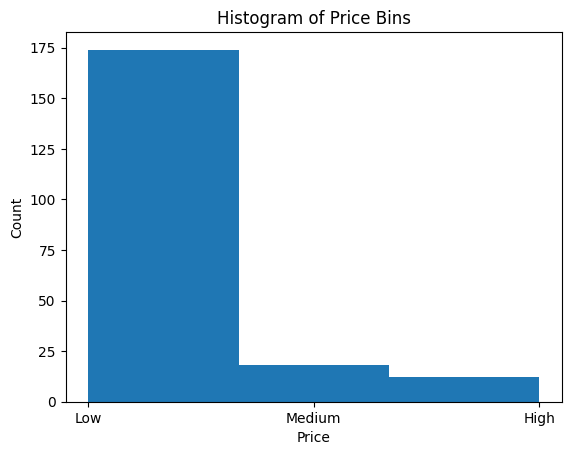

In [12]:
# visualizing the bins with a histogram
import matplotlib.pyplot as plt
plt.hist(df["price-binned"], bins=3)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Histogram of Price Bins")
plt.show()